In [1]:
import torch
import glob
import warnings 
warnings.filterwarnings('ignore')

import random
import PIL
import cv2
import os
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import time

from torch.utils.data import Dataset, DataLoader

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device : {device}")

Device : cuda


In [3]:
def get_path(path):
    normal=[]
    vir=[]
    bact=[]

    normal_label = []
    vir_label = []
    bact_label = []

    for t in os.listdir(path):
        if t=='NORMAL':
            normal_path = f"{path}{t}\\"
            for normal_data in glob.glob(normal_path + "/*.jpeg"):
                normal.append(normal_data)
                normal_label.append(np.array([1,0,0]))

        elif t=='VIRUS':
            vir_path = f"{path}{t}\\"
            for vir_data in glob.glob(vir_path + "/*.jpeg"):
                vir.append(vir_data)
                vir_label.append(np.array([0,1,0]))

        elif t=='BACTERIA':
            bact_path = f"{path}{t}\\"
            for bact_data in glob.glob(bact_path + "/*.jpeg"):
                bact.append(bact_data)
                bact_label.append(np.array([0,0,1]))

    return normal, vir, bact, normal_label, vir_label, bact_label

#Train
train_path = f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\train\\"
train_normal, train_vir, train_bact, train_normal_label, train_vir_label, train_bact_label = get_path(train_path)

#Validation
val_path = f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\val\\"
val_normal, val_vir, val_bact, val_normal_label, val_vir_label, val_bact_label = get_path(val_path)

# Test
test_path = f"C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\chest_xray\\test\\"
test_normal, test_vir, test_bact, test_normal_label, test_vir_label, test_bact_label = get_path(test_path)

In [49]:
train_vir_label

[array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1, 0]),
 array([0, 1

In [4]:
train_data = train_normal + train_vir + train_bact
train_label = train_normal_label + train_vir_label + train_bact_label

val_data = val_normal + val_vir + val_bact
val_label = val_normal_label + val_vir_label + val_bact_label

test_data = test_normal + test_vir + test_bact
test_label = test_normal_label + test_vir_label + test_bact_label

C:\Users\PC00\Desktop\HJ\AICOSS\chest_xray\train\BACTERIA\person459_bacteria_1957.jpeg
Image size => (888, 1288, 3)


(-0.5, 1287.5, 887.5, -0.5)

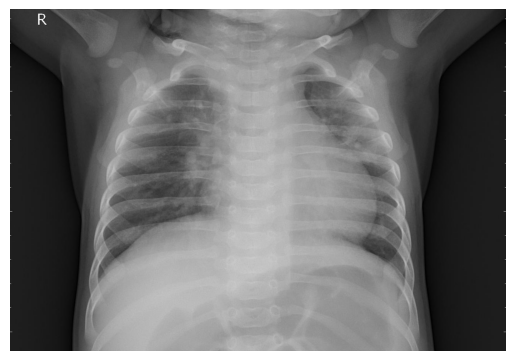

In [8]:
n = random.randint(0, len(train_data)-1)
print(f"{train_data[n]}")
img = cv2.imread(train_data[n])
print(f"Image size => {img.shape}")
plt.imshow(img)
plt.axis('off')

In [84]:
def crop_image(img, crop_ratio):
    img = np.array(img)
    dimension = len(img.shape)
    
    if dimension == 2:
        h,w = img.shape
    else:
        h,w,_ = img.shape  # _: channel
    
    crop_h = int(crop_ratio * h)
    crop_w = int(crop_ratio * w)
    
    if dimension == 2:
        cropped_image = PIL.Image.fromarray(img[h-crop_h : crop_h, w-crop_w : crop_w])
    else:
        cropped_image = PIL.Image.fromarray(img[h-crop_h : crop_h, w-crop_w : crop_w, :])
    
    return cropped_image

In [31]:
# img = PIL.Image.open(train_bact[5])

# img = np.array(img)
# img.shape
# crop = crop_image(img, crop_ratio=0.9)

(888, 1048)

In [18]:
cropped_train_normal = "C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\Cropped_Images\\train\\NORMAL\\"
cropped_train_virus = "C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\Cropped_Images\\train\\VIRUS\\"
cropped_train_bacteria = "C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\Cropped_Images\\train\\BACTERIA\\"

cropped_test_normal = "C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\Cropped_Images\\test\\NORMAL\\"
cropped_test_virus = "C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\Cropped_Images\\test\\VIRUS\\"
cropped_test_bacteria = "C:\\Users\\PC00\\Desktop\\HJ\\AICOSS\\Cropped_Images\\test\\BACTERIA\\"

In [19]:
i_count = 1
for normal in train_normal:
    i = PIL.Image.open(normal)
    crop = crop_image(i, crop_ratio=0.9)
    crop.save(f"{cropped_train_normal}{i_count}{'.jpg'}")
    i_count = i_count + 1

j_count = 1
for virus in train_vir:
    j = PIL.Image.open(virus)
    crop = crop_image(j, crop_ratio=0.9)
    crop.save(f"{cropped_train_virus}{j_count}{'.jpg'}")
    j_count = j_count + 1
    
k_count = 1
for bacteria in train_bact:
    k = PIL.Image.open(bacteria)
    crop = crop_image(k, crop_ratio=0.9)
    crop.save(f"{cropped_train_bacteria}{k_count}{'.jpg'}")
    k_count = k_count + 1

In [87]:
i_count = 1
for normal in test_normal:
    i = PIL.Image.open(normal)
    crop = crop_image(i, crop_ratio=0.9)
    crop.save(f"{cropped_test_normal}{i_count}{'.jpg'}")
    i_count = i_count + 1

j_count = 1
for virus in test_vir:
    j = PIL.Image.open(virus)
    crop = crop_image(j, crop_ratio=0.9)
    crop.save(f"{cropped_test_virus}{j_count}{'.jpg'}")
    j_count = j_count + 1
    
k_count = 1
for bacteria in test_bact:
    k = PIL.Image.open(bacteria)
    crop = crop_image(k, crop_ratio=0.9)
    crop.save(f"{cropped_test_bacteria}{k_count}{'.jpg'}")
    k_count = k_count + 1